In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.4.1


## numpy와 tensorflow 

In [35]:
arr = np.array([1,2,3])
arr.shape

(3,)

In [36]:
tf.constant([1,2,4])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 4])>

In [37]:
arr2 = np.array([[1,2,3], [4,5,6]])
arr_tf = tf.constant(arr2)
arr_tf

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [38]:
arr2.shape

(2, 3)

In [39]:
arr_tf.shape

TensorShape([2, 3])

In [40]:
arr_tf.dtype

tf.int32

In [41]:
arr = np.array([1,2,3], dtype=np.float32)
arr

array([1., 2., 3.], dtype=float32)

In [42]:
tensor = tf.constant([1,2,3], dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [43]:
# 타입변환
arr = arr.astype(np.uint8)
arr

array([1, 2, 3], dtype=uint8)

In [44]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

## 실습

In [3]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

(0.0, 8.0)

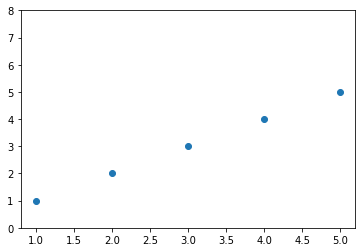

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)

In [5]:
tf.reduce_mean(x_data).numpy()

3

In [6]:
tf.square(3).numpy()

9

In [7]:
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W*x_data + b

In [8]:
W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

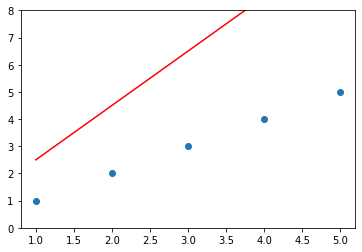

In [9]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

In [10]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [11]:
with tf.GradientTape() as tape:
    hypothesis = W*x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

In [12]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

In [13]:
# W = W - learning_rate * W_grad 

In [14]:
W1 = tf.Variable(2.0)
b1 = tf.Variable(0.5)

(0.0, 8.0)

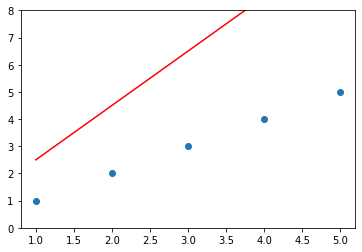

In [15]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)

In [16]:
for i in range(1, 101):
    with tf.GradientTape() as tape:
        hypothesis = W*x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W,b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print(f"{i:5}|{W.numpy():10.4f}|{b.numpy():10.4f}|{cost:10.6f}")
        

   10|    0.9990|    0.2146|  0.071626
   20|    0.9502|    0.1939|  0.007110
   30|    0.9486|    0.1866|  0.006374
   40|    0.9501|    0.1803|  0.005955
   50|    0.9517|    0.1743|  0.005565
   60|    0.9533|    0.1685|  0.005201
   70|    0.9549|    0.1629|  0.004860
   80|    0.9564|    0.1574|  0.004542
   90|    0.9578|    0.1522|  0.004245
  100|    0.9592|    0.1471|  0.003967


(0.0, 8.0)

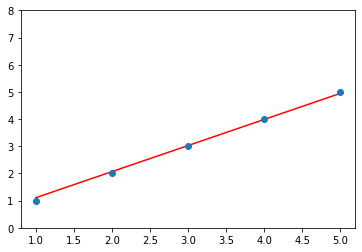

In [17]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)

## W1, W2

In [18]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random.uniform((1, ), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1, ), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1, ), -10.0, 10.0))

learning_rate = tf.Variable(0.001)

for i in range(1, 1001):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2*x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i%50 == 0:
        print(f"{i:5}|{W1.numpy()[0]:10.4f}|{W2.numpy()[0]:10.4f}|{b.numpy()[0]:10.4f}|{cost:10.6f}")
    
    # list라서 [0]으로 불러야 오류 발생 안함



   50|    2.1731|    6.6622|   -1.8641|110.132645
  100|    1.8639|    5.0048|   -2.4026| 45.361641
  150|    1.7628|    3.9357|   -2.7039| 19.694832
  200|    1.7415|    3.2424|   -2.8679|  9.226077
  250|    1.7460|    2.7901|   -2.9508|  4.872801
  300|    1.7553|    2.4929|   -2.9850|  3.030190
  350|    1.7621|    2.2957|   -2.9894|  2.230146
  400|    1.7646|    2.1632|   -2.9757|  1.866081
  450|    1.7632|    2.0725|   -2.9507|  1.685394
  500|    1.7587|    2.0089|   -2.9190|  1.582439
  550|    1.7521|    1.9630|   -2.8830|  1.512918
  600|    1.7439|    1.9286|   -2.8447|  1.458224
  650|    1.7348|    1.9017|   -2.8051|  1.410523
  700|    1.7251|    1.8797|   -2.7648|  1.366503
  750|    1.7151|    1.8610|   -2.7244|  1.324749
  800|    1.7049|    1.8444|   -2.6841|  1.284647
  850|    1.6946|    1.8294|   -2.6441|  1.245916
  900|    1.6843|    1.8154|   -2.6044|  1.208420
  950|    1.6741|    1.8021|   -2.5652|  1.172079
 1000|    1.6640|    1.7893|   -2.5265|  1.136843


In [19]:
x_data = [[1,0,3,0,5],[0,2,0,4,0]]
y_data = [1,2,3,4,5]
# W * (2,5) = (1*5) => W는 (1,2)

x_data = np.array(x_data).astype(np.float32) # 버전 문제로 형 변환

W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0)) # 입력과 출력 맞추려고
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

tf.matmul(W, x_data)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[-0.833874 ,  0.8005066, -2.501622 ,  1.6010132, -4.1693697]],
      dtype=float32)>

In [23]:
x_data = [[1,0,3,0,5],[0,2,0,4,0]]
y_data = [1,2,3,4,5]
# W * (2,5) = (1*5) => W는 (1,2)

x_data = np.array(x_data).astype(np.float32) # 버전 문제로 형 변환

W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0)) # 입력과 출력 맞추려고
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

# tf.matmul(W, x_data)  두 배열의 행렬곱

learning_rate = tf.Variable(0.001)

for i in range(1, 1001):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    W_grad, b_grad = tape.gradient(cost, [W,b])
    # weight 업데이트 해주는 부분
    W.assign_sub(learning_rate * W_grad) 
    b.assign_sub(learning_rate * b_grad)
    
    if i%50 == 0:
        print(f"{i:5}|{W.numpy()[0][0]:10.4f}|{W.numpy()[0][1]:10.4f}|{b.numpy()[0]:10.4f}|{cost:10.6f}")


   50|    0.6137|    0.3933|   -0.4542|  4.117135
  100|    0.8573|    0.6310|   -0.3136|  1.252487
  150|    0.9643|    0.7798|   -0.2366|  0.422963
  200|    1.0098|    0.8737|   -0.1930|  0.156447
  250|    1.0280|    0.9332|   -0.1673|  0.062421
  300|    1.0344|    0.9710|   -0.1515|  0.026815
  350|    1.0359|    0.9950|   -0.1413|  0.012672
  400|    1.0356|    1.0103|   -0.1343|  0.006871
  450|    1.0347|    1.0200|   -0.1293|  0.004428
  500|    1.0337|    1.0260|   -0.1255|  0.003364
  550|    1.0328|    1.0297|   -0.1225|  0.002874
  600|    1.0319|    1.0319|   -0.1199|  0.002625
  650|    1.0312|    1.0331|   -0.1176|  0.002477
  700|    1.0306|    1.0337|   -0.1155|  0.002374
  750|    1.0300|    1.0339|   -0.1136|  0.002291
  800|    1.0295|    1.0339|   -0.1117|  0.002217
  850|    1.0290|    1.0337|   -0.1100|  0.002148
  900|    1.0285|    1.0334|   -0.1082|  0.002083
  950|    1.0280|    1.0330|   -0.1066|  0.002020
 1000|    1.0276|    1.0326|   -0.1049|  0.001959


In [28]:
np.array(x_data).shape

(2, 5)

In [29]:
W

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[1.027599 , 1.0325553]], dtype=float32)>

In [30]:
tf.matmul(W, x_data)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[1.027599 , 2.0651107, 3.082797 , 4.1302214, 5.137995 ]],
      dtype=float32)>

In [31]:
x_data = [[1,0,3,0,5],[0,2,0,4,0]]
y_data = [1,2,3,4,5]
# W * (2,5) = (1*5) => W는 (1,2)

x_data = np.array(x_data).astype(np.float32) # 버전 문제로 형 변환

W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0)) 
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001 )

for i in range(1, 1001):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    grads = tape.gradient(cost, [W,b])
    
    optimizer.apply_gradients(zip(grads, [W,b])) 
    
    if i%50 == 0:
        print(f"{i:5}|{W.numpy()[0][0]:10.4f}|{W.numpy()[0][1]:10.4f}|{b.numpy()[0]:10.4f}|{cost:10.6f}")


   50|    0.5878|    0.3316|    0.5334|  1.649735
  100|    0.7212|    0.4955|    0.6067|  0.597537
  150|    0.7805|    0.6001|    0.6423|  0.269121
  200|    0.8067|    0.6677|    0.6578|  0.154900
  250|    0.8185|    0.7120|    0.6624|  0.110987
  300|    0.8242|    0.7416|    0.6610|  0.092329
  350|    0.8275|    0.7617|    0.6562|  0.083374
  400|    0.8299|    0.7757|    0.6495|  0.078328
  450|    0.8320|    0.7859|    0.6416|  0.074919
  500|    0.8341|    0.7935|    0.6331|  0.072227
  550|    0.8363|    0.7994|    0.6243|  0.069872
  600|    0.8385|    0.8043|    0.6154|  0.067695
  650|    0.8408|    0.8084|    0.6064|  0.065628
  700|    0.8431|    0.8121|    0.5974|  0.063642
  750|    0.8454|    0.8154|    0.5885|  0.061723
  800|    0.8477|    0.8185|    0.5797|  0.059866
  850|    0.8500|    0.8215|    0.5710|  0.058065
  900|    0.8522|    0.8243|    0.5624|  0.056320
  950|    0.8544|    0.8271|    0.5539|  0.054627
 1000|    0.8566|    0.8297|    0.5455|  0.052985


# 2차 방정식 추정
$ y = 2x^2 + 3x + 5 $

In [32]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5

In [33]:
x.shape

(100,)

In [34]:
y.shape

(100,)

In [51]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5

x = np.array(x).astype(np.float32) # 버전 문제로 형 변환
x_data = np.array([x*x, x])
W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0)) 
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

In [61]:
%%time
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
historyLoss = []
for i in range(1, 10001):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y))
    
    historyLoss.append(cost)
    grads = tape.gradient(cost, [W,b])
    
    optimizer.apply_gradients(zip(grads, [W,b])) 
    
    if i%1000 == 0:
        print(f"{i:5}|{W.numpy()[0][0]:10.4f}|{W.numpy()[0][1]:10.4f}|{b.numpy()[0]:10.4f}|{cost:10.6f}")

 1000|       nan|       nan|       nan|       nan
 2000|       nan|       nan|       nan|       nan
 3000|       nan|       nan|       nan|       nan
 4000|       nan|       nan|       nan|       nan
 5000|       nan|       nan|       nan|       nan
 6000|       nan|       nan|       nan|       nan
 7000|       nan|       nan|       nan|       nan
 8000|       nan|       nan|       nan|       nan
 9000|       nan|       nan|       nan|       nan
10000|       nan|       nan|       nan|       nan
CPU times: user 14.3 s, sys: 87 ms, total: 14.4 s
Wall time: 14.8 s


In [54]:
%%time

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

for i in range(1, 10001):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b
        cost = tf.sqrt(tf.reduce_mean(tf.square(hypothesis - y))) # RMSE
    
    grads = tape.gradient(cost, [W,b])
    
    optimizer.apply_gradients(zip(grads, [W,b])) 
    
    if i%1000 == 0:
        print(f"{i:5}|{W.numpy()[0][0]:10.4f}|{W.numpy()[0][1]:10.4f}|{b.numpy()[0]:10.4f}|{cost:10.6f}")

 1000|    2.0103|    2.9999|    5.0007|  0.010262
 2000|    2.0103|    2.9999|    5.0007|  0.010262
 3000|    2.0103|    2.9999|    5.0007|  0.010262
 4000|    2.0103|    2.9999|    5.0007|  0.010262
 5000|    2.0103|    2.9999|    5.0007|  0.010262
 6000|    2.0103|    2.9999|    5.0007|  0.010262
 7000|    2.0103|    2.9999|    5.0007|  0.010262
 8000|    2.0103|    2.9999|    5.0007|  0.010262
 9000|    2.0103|    2.9999|    5.0007|  0.010262
10000|    2.0103|    2.9999|    5.0007|  0.010262
CPU times: user 14.6 s, sys: 85 ms, total: 14.7 s
Wall time: 14.9 s


In [57]:
%%time

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for i in range(1, 10001):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b
        cost = tf.sqrt(tf.reduce_mean(tf.square(hypothesis - y))) # RMSE
    
    grads = tape.gradient(cost, [W,b])
    
    optimizer.apply_gradients(zip(grads, [W,b])) 
    
    if i%1000 == 0:
        print(f"{i:5}|{W.numpy()[0][0]:10.4f}|{W.numpy()[0][1]:10.4f}|{b.numpy()[0]:10.4f}|{cost:10.6f}")

 1000|    2.0000|    3.0000|    5.0000|  0.000766
 2000|    2.0000|    3.0000|    5.0000|  0.000729
 3000|    2.0000|    3.0000|    5.0000|  0.000711
 4000|    2.0000|    3.0000|    5.0000|  0.000711
 5000|    2.0000|    3.0000|    5.0000|  0.000710
 6000|    2.0000|    3.0000|    5.0000|  0.000711
 7000|    2.0000|    3.0000|    5.0000|  0.000710
 8000|    2.0000|    3.0000|    5.0000|  0.000710
 9000|    2.0000|    3.0000|    5.0000|  0.000711
10000|    2.0000|    3.0000|    5.0000|  0.000710
CPU times: user 18.6 s, sys: 94.2 ms, total: 18.7 s
Wall time: 18.8 s
